<a href="https://colab.research.google.com/github/Randasabag/P10/blob/main/P10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sommaire :
**Partie 1 : Importation des données**
 - <a href="#C1">Importation des librairies</a>
 - <a href="#C2">Importation du jeu de données</a>
 
**Partie 2 : Analyse du jeu de données**
 - <a href="#C3">Affichage du nombre de lignes et colonnes</a>
 - <a href="#C4">Affichage des informations</a>
 - <a href="#C5">Analyse des doublons</a>
 - <a href="#C6">Analyse des valeurs manquantes</a>


**Partie 3 : Analyse univariée des variables**
 - <a href="#C7"></a>
 - <a href="#C8"></a>
 - <a href="#C9"


**Partie 4 : Analyse bivariée des indicateurs**
 - <a href="#C18">a>

**Partie 5 : Classification** 
 - <a href="#C24">Classification Ascendante Hiérarchique (CAH)</a>
 - <a href="#C25">Analyse en Composantes Principales (PCA)</a>
 - <a href="#C26">K-Means</a>
 - <a href="#C27">Analyse en Composantes Principales (PCA)</a>

# **<font color='indianred'>Partie 1 : Importation des données</font>**

## <a name="C1"><font color='LightSeaGreen'>Importation des librairies</font></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import shapiro
import statsmodels.api as sm
import statsmodels.formula.api as smf
import io
from google.colab import files

## <a name="C2"><font color='LightSeaGreen'>Importation des données</font></a>

In [3]:
uploaded = files.upload()

Saving billets.xlsx to billets.xlsx


In [4]:
from google.colab import files
functions = files.upload()

Saving functions.py to functions.py


In [5]:
#Billets
df_billets=pd.read_excel(io.BytesIO(uploaded['billets.xlsx'])) 
df_billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# **<font color='indianred'>Partie 2 : Analyse du jeu de données</font>**

## <a name="C3"><font color='LightSeaGreen'>Affichage du nombre de lignes et colonnes</font></a>

In [6]:
#nombre de lignes et colonnes
print('Billets',df_billets.shape)

Billets (1500, 7)


## <a name="C4"><font color='LightSeaGreen'>Affichage des informations</font></a>

In [7]:
print('Table billets')
df_billets.info()

Table billets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


###<font color='purple'>Encodage</font>

In [8]:
#renommage : is_gunuine en nature
df_billets=df_billets.rename(columns={'is_genuine':'nature'}).replace({False: 1, True: 0})

In [9]:
#Encodage transforme les variables qualitatives False et True en 1 et 0
#from sklearn.preprocessing import LabelEncoder
#y = np.array(['False', 'True'])
#encoder = LabelEncoder()
#df_billets['nature'] = encoder.fit_transform(df_billets['nature'])

In [10]:
df_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nature        1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB


In [11]:
#donner un nom aux billets
df_billets['code_billet']="b"+(df_billets.index).astype(str)
df_billets=df_billets.set_index('code_billet')
df_billets.head(60)

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b0,0,171.81,104.86,104.95,4.52,2.89,112.83
b1,0,171.46,103.36,103.66,3.77,2.99,113.09
b2,0,172.69,104.48,103.50,4.40,2.94,113.16
b3,0,171.36,103.91,103.94,3.62,3.01,113.51
b4,0,171.73,104.28,103.46,4.04,3.48,112.54
b5,0,172.17,103.74,104.08,4.42,2.95,112.81
b6,0,172.34,104.18,103.85,4.58,3.26,112.81
b7,0,171.88,103.76,104.08,3.98,2.92,113.08
b8,0,172.47,103.92,103.67,4.00,3.25,112.85


In [12]:
df_billets['nature'].value_counts()

0    1000
1     500
Name: nature, dtype: int64

Il y a 1000 vrais billets et 500 faux billets.

###<font color='purple'>Analyse statistique</font>

In [13]:
df_billets.describe()

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,0.333333,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,0.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


## <a name="C7"><font color='LightSeaGreen'>Analyse des doublons</font></a>

In [14]:
#Fonction qui detecte les doublons
def detect_doublons(df):
    doub=df[df[df.columns].duplicated(subset=None, keep='first')]
    print('------------------') 
    print('La table contient', len(doub), 'doublons.')
    print(doub.shape)
    print('\n') 
    print(doub)
    print('\n')

In [15]:
detect_doublons(df_billets)

------------------
La table contient 0 doublons.
(0, 7)


Empty DataFrame
Columns: [nature, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []




## <a name="C5"><font color='LightSeaGreen'>Analyse des valeurs manquantes</font></a>

In [16]:
#Création d'une fonction calculant le pourcentage de valeurs manquantes 
#et affichant une heatmap pour visualiser les valeurs manquantes 
def val_manq(df):
    ligne,colonne=df.shape
    nb_cell=ligne*colonne
    nb_null=df.isnull().sum().sum()
    prct=nb_null *100/nb_cell
    print('Nombre de valeurs manquantes =',nb_null)
    print('Nombre de cellulles totales =',nb_cell)
    print('Pourcentage de valeurs manquantes = ',round(prct,2),'%') 
    print('\n')
    #print('Pourcentage de valeurs manquantes avec le nombre de colonnes =\n',(df.isna().sum()).value_counts(ascending=True))
    #Calcul des pourcentages de valeurs manquantes par variable(colonne)
    print('\n')
    print('Pourcentage de valeurs manquantes par variable/colonne =\n', 
          (df.isna().sum()).sort_values(ascending=True))
    print('\n')

In [17]:
val_manq(df_billets)

Nombre de valeurs manquantes = 37
Nombre de cellulles totales = 10500
Pourcentage de valeurs manquantes =  0.35 %




Pourcentage de valeurs manquantes par variable/colonne =
 nature           0
diagonal         0
height_left      0
height_right     0
margin_up        0
length           0
margin_low      37
dtype: int64




# **<font color='indianred'>Partie 5 : Régression Linéaire Multiple</font>**

## <a name="C23"><font color='LightSeaGreen'>Création de 2 dataframes : Vrais et Faux billets</font></a>

In [18]:
variables=['diagonal','height_left','height_right','margin_low','margin_up','length']

In [19]:
sum(df_billets[df_billets.isnull().any(axis=1)]['nature']==0)

29

In [20]:
sum(df_billets[df_billets.isnull().any(axis=1)]['nature']==1)

8

Il y a 8 valeurs manquantes parmi les faux billets et 29 valeurs manquantes parmi les vrais billets.

In [54]:
#Récupération des lignes sans valeurs manquantes
df_billets_train=df_billets[df_billets['margin_low'].isnull()==False]
#avec valeurs manquantes
df_billets_test=df_billets[df_billets['margin_low'].isnull()==True]
df_billets_train

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b0,0,171.81,104.86,104.95,4.52,2.89,112.83
b1,0,171.46,103.36,103.66,3.77,2.99,113.09
b2,0,172.69,104.48,103.50,4.40,2.94,113.16
b3,0,171.36,103.91,103.94,3.62,3.01,113.51
b4,0,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
b1495,1,171.75,104.38,104.17,4.42,3.09,111.28
b1496,1,172.19,104.63,104.44,5.27,3.37,110.97
b1497,1,171.80,104.01,104.12,5.51,3.36,111.95


In [22]:
#Création de X_train et y_train
X_train = df_billets_train.drop("margin_low", axis=1)
y_train = df_billets_train["margin_low"]

## <a name="C23"><font color='LightSeaGreen'>Implémentationn de la Régression Linéaire Multiple</font></a>

In [23]:
#Création du modèle de Régression Linéaire
from sklearn.linear_model import LinearRegression
reg_lin_multi = LinearRegression()
reg_lin_multi_model = reg_lin_multi.fit(X_train, y_train)

#Prédictions
X_train = df_billets_train[["nature","diagonal","height_left","height_right", "margin_up", "length"]]
df_billets_train["pred_train"] = reg_lin_multi.predict(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
#Régression Linéaire Multiple sur le dataframe des df_billets
resultats = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data=df_billets).fit()
print(resultats.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          2.60e-202
Time:                        14:44:05   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

R2 = 0.477 et R2 ajusté = 0.476

Toutes les p-values des variables sont inférieures à 0.05 donc ce sont toutes des variables significatives qu'on va garder.

In [45]:
Coef = resultats.params  # coefficients du modèle
Coef

Intercept       22.994843
diagonal        -0.111060
height_left      0.184122
height_right     0.257138
margin_up        0.256188
length          -0.409103
dtype: float64

In [ ]:
pred_train = resultats.predict(df_billets_train).round(2)  # Faire de prédiction sur le df des valeurs non manquantes
pred_train

In [28]:
#df_pred=pd.DataFrame({"margin_low": df_billets_train['margin_low']})
df_billets_train['margin_low_pred'] = pred_train
df_billets_train['residuals'] = df_billets_train['margin_low'] - df_billets_train['margin_low_pred']
df_billets_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,nature,diagonal,height_left,height_right,margin_low,margin_up,length,pred_train,margin_low_pred,residuals
code_billet,,,,,,,,,,
b0,0,171.81,104.86,104.95,4.52,2.89,112.83,4.210681,4.79,-0.27
b1,0,171.46,103.36,103.66,3.77,2.99,113.09,4.115999,4.14,-0.37
b2,0,172.69,104.48,103.50,4.40,2.94,113.16,4.137766,4.13,0.27
b3,0,171.36,103.91,103.94,3.62,3.01,113.51,4.134463,4.16,-0.54
b4,0,171.73,104.28,103.46,4.04,3.48,112.54,4.031004,4.58,-0.54
...,...,...,...,...,...,...,...,...,...,...
b1495,1,171.75,104.38,104.17,4.42,3.09,111.28,5.281064,5.19,-0.77
b1496,1,172.19,104.63,104.44,5.27,3.37,110.97,5.231240,5.46,-0.19
b1497,1,171.80,104.01,104.12,5.51,3.36,111.95,5.208539,4.90,0.61


## <a name="C23"><font color='LightSeaGreen'>Evaluation de la Régression Linéaire / Hypothèses</font></a>



*  **R au carré ou coefficient de détermination** est une valeur comprise entre 0 et 1, indiquant la quantité de variance dans les variables cibles réelles expliquées par le modèle. Un R au carré plus élevé signifie de meilleures performances du modèle.
*   Élément de liste




Moyenne de la valeur absolue des erreurs (MAE) :  0.37
Moyenne des erreurs au carré (MSE) :  0.23
Racine carrée de la moyenne des erreurs au carré (RMSE) :  0.48
Coefficient de détermination (R au carré) :  0.48


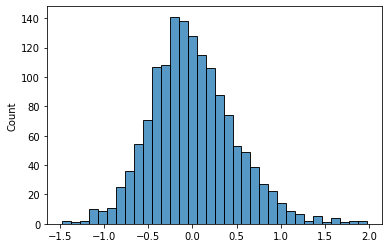

In [43]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(df_billets_train['margin_low'],df_billets_train['margin_low_pred'])**(1/2)
#distribution des erreurs
plt.figure
sns.histplot((df_billets_train['margin_low']-df_billets_train['margin_low_pred']))
#MAE,MSE,RMSE
print('Moyenne de la valeur absolue des erreurs (MAE) : ',mean_absolute_error(df_billets_train['margin_low'],df_billets_train['margin_low_pred']).round(2))
print('Moyenne des erreurs au carré (MSE) : ',mean_squared_error(df_billets_train['margin_low'],df_billets_train['margin_low_pred']).round(2))
print('Racine carrée de la moyenne des erreurs au carré (RMSE) : ',rmse.round(2))

#R au carré - coefficient de détermination
from sklearn.metrics import r2_score
print('Coefficient de détermination (R au carré) : ',r2_score(df_billets_train['margin_low'],df_billets_train['margin_low_pred']).round(2))

R2 = 0.48 nous indique un mauvais ajustement linéaire.

###<font color='purple'>Vérification de l'hypothèse de Linéarité</font> 

In [30]:
def linear_assumption(df):
   
    print("Hypothèse 1 : Relation linéaire entre la cible et l'entité", '\n')
    print("Vérification avec un nuage de points de la valeur réelle par rapport à la prévision.',« Les prédictions doivent suivre la ligne diagonale. »")
    
    #Plotting the actual vs predicted values
    sns.lmplot(x='margin_low', y='margin_low_pred', data=df, fit_reg=False, size=7)
        
    #Plotting the diagonal line
    line_coords = np.arange(df.min().min(), df.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Hypothèse 1 : Relation linéaire entre la cible et l'entité 

Vérification avec un nuage de points de la valeur réelle par rapport à la prévision.',« Les prédictions doivent suivre la ligne diagonale. »


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


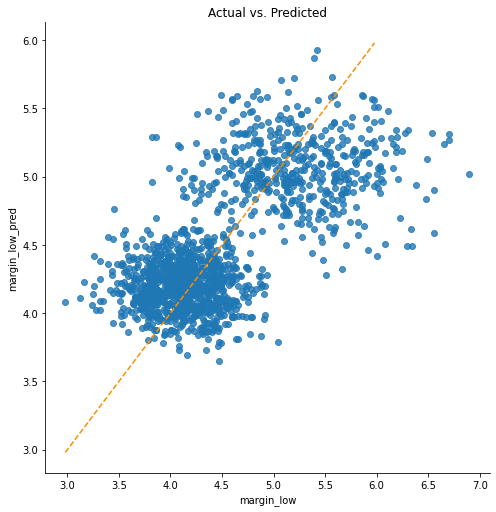

In [31]:
linear_assumption(df_billets_train[['margin_low', 'margin_low_pred']])

**La relation n'est pas linéaire : le graphique nous montre l'absence d'une ligne droite qui devrait étre formée par le nuage des points.**

###<font color='purple'>Vérification de l'hypothèse de Multicollinéarité des résidus</font> 

####<font color='orange'>Facteur d'influence de la variance (VIF)</font>

In [33]:
#Vérification de la colinéarité des variables (VIF)
var = resultats.model.exog

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(var, i) for i in np.arange(1,var.shape[1])]
print("Facteur d'influence de la variance (VIF) :", vif)
print("Moyenne du VIF : ", np.mean(vif))

Facteur d'influence de la variance (VIF) : [1.0136128990686286, 1.1382605736082485, 1.230114515556037, 1.4044037781843612, 1.5769501453665828]
Moyenne du VIF :  1.2726683823567717


**Tous les coefficients sont inférieurs à 10, il n'y a pas de multicolinéarité entre les résidus.**

####<font color='orange'>Test de Durbin-Watson</font>

Ce test détecte la présence d'autocorrélation entre les résidus :    

*   H0 : il n'y a pas de corrélation
*   H1 : il y a autocorrélation

Résultat :    
*   Si test-statistique = 2 => pas de corrélation
*   Si test-statistique proche de 0 => corrélation positive
*   Si test-statistique proche de 4 => corrélation négative
*   Si test-statistique entre 1.5 et 2.5 => on peut rejeter l'autocorrélation 





In [48]:
#Vérification avec le test de Durbin-Watson 
from statsmodels.stats.stattools import durbin_watson
print("Test de Durbin-Watson : ", durbin_watson(resultats.resid))

Test de Durbin-Watson :  1.8927631665241567


**Le test est entre 1.5 et 2.5 (même proche de 2) donc on peut dire qu'il n'y a pas de colinéarité entre les résidus.**


###<font color='purple'>Vérification de l'hypothèse de l'Homoscédasticité des résidus</font> 

Vérification de la constance de la variance des résidus (distribution homogène)

*   H0 : Homoscédasticité
*   H1 : Hétéroscédasticité



In [34]:
def homoscedasticity_assumption(df):
  
    print("Hypothèse de l'Homoscédasticité", '\n')
    
    print('Les résidus doivent avoir une variance relative constante')
        
    #Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df.index, y=df.residuals, alpha=0.5)
    plt.plot(np.repeat(0, len(df.index)), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Les résidus')
    plt.show() 

In [35]:
#Test de l'Homoscédasticité
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
 
#Résultats du test
test_result = sms.het_breuschpagan(resultats.resid, resultats.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 80.16261280172587),
 ('p-value', 7.759535216287205e-16),
 ('f-value', 16.892358846147992),
 ('f p-value', 2.92274965665814e-16)]

Hypothèse de l'Homoscédasticité 

Les résidus doivent avoir une variance relative constante


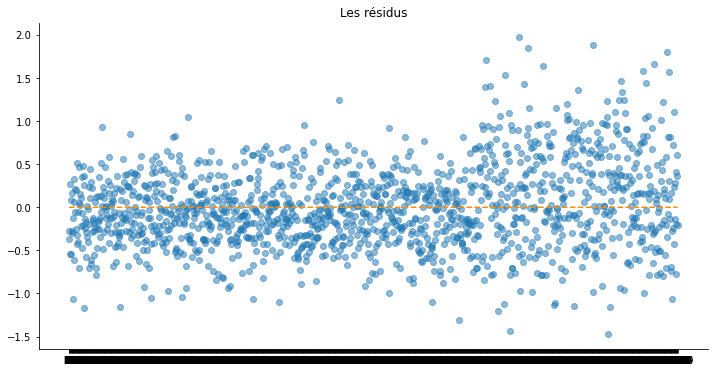

In [36]:
homoscedasticity_assumption(df_billets_train)

**p-value < 0.05 donc H0 est rejetée et il y a Hétéroscédasticité**

###<font color='purple'>Vérification de l'hypothèse de Normalité des résidus</font> 

Test de Normalité de la distribution des résidus avec Shapiro :    


*   H0 : il y a normalité de la distribution des résidus (p-value > 0.05)
*   H1 : il n'y a pas normalité de la distribution des résidus (p-value < 0.05)



Normalité des résidus (Shapiro)
stats : 0.9857879281044006 
p-value : 8.536943374437556e-11
H0 rejetée : La distribution semble ne pas être normale




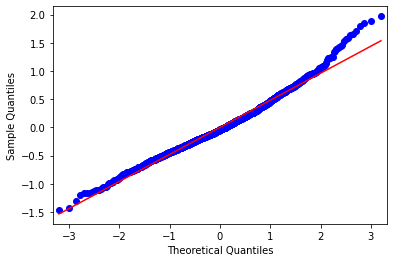

In [37]:
#Test de normalité le plus robuste : Test de Shapiro sur les résidus
from statsmodels.graphics.gofplots import qqplot
print('Normalité des résidus (Shapiro)')
print ('stats :', st.shapiro(resultats.resid)[0],
    '\np-value :', st.shapiro(resultats.resid)[1])
if st.shapiro(resultats.resid)[1] > 0.05:
    print('H0 acceptée : La distribution semble être normale')
else:
    print('H0 rejetée : La distribution semble ne pas être normale')
print('\n')
qqplot(resultats.resid, line='s')
plt.savefig("age_categ_shapiro.png")
plt.show()

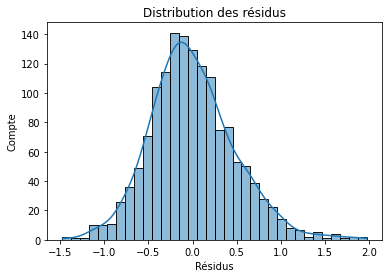

In [38]:
# Graphique
sns.histplot(resultats.resid, kde=True)
plt.xlabel("Résidus")
plt.ylabel("Compte")
plt.title("Distribution des résidus")
plt.show()

In [49]:
#Moyenne des résidus 
print("Moyenne des résidus : ", resultats.resid.mean())

Moyenne des résidus :  2.449016913923654e-13


**Nous avons une p-value < 0.05 avec le test de Shapiro qui indique qu'il n'y aurait pas de normalité dans la distribution des résidus. Pourtant on peut voir graphiquement que la courbe est centrée autour de 0 et presque symétrique, en effet la moyenne des résidus est très proche de 0. Donc, on pourrait ne pas écarter la normalité de la distribution des résidus en prenant en compte que le test de Shapiro est peu robuste aux outliers.**

## <a name="C23"><font color='LightSeaGreen'>Remplacement des valeurs manquantes</font></a>

In [53]:
#Création de X_test et y_test du dataframe des valeurs manquantes
X_test = df_billets_test.drop("margin_low", axis=1)
y_test = df_billets_test['margin_low']
len(y_test)

37

In [ ]:
y_pred = resultats.predict(df_billets_test).round(2)  # Faire de prédiction sur le test
y_pred

In [40]:
#df_billets['margin_low']=df_billets['margin_low'].fillna(pred)

In [41]:
df_billets[df_billets.isnull().any(axis=1)]

,nature,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b72,0,171.94,103.89,103.45,NaN,3.25,112.79
b99,0,171.93,104.07,104.18,NaN,3.14,113.08
b151,0,172.07,103.80,104.38,NaN,3.02,112.93
b197,0,171.45,103.66,103.80,NaN,3.62,113.27
b241,0,171.83,104.14,104.06,NaN,3.02,112.36
b251,0,171.80,103.26,102.82,NaN,2.95,113.22
b284,0,171.92,103.83,103.76,NaN,3.23,113.29
b334,0,171.85,103.70,103.96,NaN,3.00,113.36
b410,0,172.56,103.72,103.51,NaN,3.12,112.95


 ## <a name="C23"><font color='LightSeaGreen'>Evaluation de la regression linéaire</font></a>

In [42]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_pred,y_test)**(1/2)
#distribution des erreurs
plt1.figure
sns.histplot((y_test-y_pred))
#MAE,MSE,RMSE
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE: ',rmse)

#R au carré - coefficient de détermination
from sklearn.metrics import r2_score
print('R au carré: ',r2_score(y_pred,y_test))

NameError: ignored

# **<font color='indianred'>Partie 3 : Analyse univariée des variables</font>**

## <a name="C11"><font color='LightSeaGreen'>diagonal</font></a>

In [ ]:
#Représentation la variable diagonal sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["diagonal"], color="b")
plt.title('Distribution de la variable diagonal')
plt.savefig("distribution_diagonal_boxplot.png")
plt.show

In [ ]:
#détecte les outliers et les filtre pour avoir un nouveau dataframe sans outliers
def liste_outliers(df, colonne):
  #1er quartile
  q1 = df[colonne].quantile(0.25)
  #3eme quartile
  q3 = df[colonne].quantile(0.75)
  #écart interquatile
  iqr = q3 - q1
  print('Ecart interquatile =', round(iqr,2))
  seuil_min = q1 -(1.5 * iqr) 
  seuil_max = q3 +(1.5 * iqr)
  print('Seuil minimum =', round(seuil_min,2))
  print('Seuil maximum =', round(seuil_max,2))

  #dataframe des outliers
  dfo = df[(df[colonne] < seuil_min) | (df[colonne] > seuil_max)]
  #liste des outliers
  liste_out=(dfo[colonne].tolist())
  print('Nombre doutliers:', len(liste_out))
  print('Liste des outliers :', liste_out)
  print('\n')

In [ ]:
#affichage des outliers 
liste_outliers(df_billets, 'diagonal')

In [ ]:
l=[171.04, 172.92, 172.89, 172.89, 171.04, 173.01, 171.05]
df_billets[df_billets['diagonal'].isin (l)].sort_values('diagonal')

In [ ]:
#df_outdiag=df_billets[df_billets['diagonal'].isin (l)]
#df_outdiag[['nature', 'diagonal']].sort_values('diagonal')

On trouve 7 outliers pour la variable diagonal dont 3 vrais billets et 4 faux billets.

## <a name="C11"><font color='LightSeaGreen'>height_left</font></a>

In [ ]:
#Représentation la variable height_left sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["height_left"], color="purple")
plt.title('Distribution de la variable height_left')
plt.savefig("distribution_height_left_boxplot.png")
plt.show

In [ ]:
#affichage des outliers 
liste_outliers(df_billets, 'height_left')

In [ ]:
l=[104.86, 103.2, 103.14, 104.88, 104.86, 104.85]
df_billets[df_billets['height_left'].isin (l)].sort_values('height_left')

On trouve 6 outliers pour la variable height_left dont 3 vrais billets et 3 faux billets.

## <a name="C11"><font color='LightSeaGreen'>height_right</font></a>

In [ ]:
#Représentation la variable height_right sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["height_right"], color="pink")
plt.title('Distribution de la variable height_right')
plt.savefig("distribution_height_right_boxplot.png")
plt.show

In [ ]:
#affichage des outliers 
liste_outliers(df_billets, 'height_right')

In [ ]:
l=[104.95, 103.03, 102.97, 102.95, 102.82, 102.91, 103.04, 104.87, 104.86, 104.83, 104.95]
df_billets[df_billets['height_right'].isin (l)].sort_values('height_right')

Il y a 11 outliers pour la variable height_right dont 7 vrais billets et 4 faux billets.

## <a name="C11"><font color='LightSeaGreen'>margin_low</font></a>

In [ ]:
#Représentation la variable margin_low sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["margin_low"], color="orange")
plt.title('Distribution de la variable margin_low')
plt.savefig("distribution_margin_low_boxplot.png")
plt.show

In [ ]:
#affichage des outliers 
liste_outliers(df_billets, 'margin_low')

In [ ]:
l=[6.2, 6.7, 6.33, 6.65, 6.21, 6.23, 6.3, 6.56, 6.7, 6.16, 6.34, 6.48, 6.11, 6.14, 6.49, 6.9, 6.19, 6.16, 6.28, 6.19, 6.38, 6.25, 6.56, 6.19, 6.54, 6.29]
df_billets[df_billets['margin_low'].isin (l)].sort_values('margin_low')

On trouve 24 outliers pour la variable margin_low qui sont tous de faux billets.

## <a name="C11"><font color='LightSeaGreen'>margin_up</font></a>

In [ ]:
#Représentation la variable margin_up sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["margin_up"], color="lightblue")
plt.title('Distribution de la variable margin_up')
plt.savefig("distribution_margin_up_boxplot.png")
plt.show

In [ ]:
#affichage des outliers 
liste_outliers(df_billets, 'margin_up')

In [ ]:
l=[2.27, 3.91, 3.81]
df_billets[df_billets['margin_up'].isin (l)].sort_values('margin_up')

On voit 3 outliers pour la variable margin_up dont 1 vrai billet et 2 faux billets.

## <a name="C11"><font color='LightSeaGreen'>length</font></a>

In [ ]:
#Représentation la variable length sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["length"], color="lightgreen")
plt.title('Distribution de la variable length')
plt.savefig("distribution_length_boxplot.png")
plt.show

In [ ]:
#affichage des outliers 
liste_outliers(df_billets, 'length')

In [ ]:
l=[109.49, 109.97, 109.93]
df_billets[df_billets['length'].isin (l)].sort_values('length')

On voit 3 outliers pour la variable length qui sont tous de faux billets.

# **<font color='indianred'>Partie 4 : Analyse bivariée des variables</font>**

## <a name="C23"><font color='LightSeaGreen'>Matrice de corrélation</font></a>

In [ ]:
matrix = df_billets[variables].corr()
sns.heatmap(data=matrix, annot=True, cmap='PiYG');

## <a name="C23"><font color='LightSeaGreen'>Visualisation par paires</font></a>

In [ ]:
#Visualisation
#sns.pairplot(df_billets, x_vars=['diagonal','height_left','height_right','margin_low','margin_up','length'], y_vars='nature', kind='reg')
sns.pairplot(df_billets, diag_kind="kde",height=1.5, x_vars=variables, y_vars=variables, kind='reg')

## <a name="C23"><font color='LightSeaGreen'>Visualisation des groupes par boxplot</font></a>

In [ ]:
#Comparaison visuelle des clusters par boxplot
plt.figure(figsize=(15, 8))
sns.set(style="white", palette="husl")
plt.subplot(2, 3, 1)

plt.subplot(231)
sns.boxplot(data=df_billets, x='nature', y='diagonal')

plt.subplot(232)
sns.boxplot(data=df_billets, x='nature', y='height_left')

plt.subplot(233)
sns.boxplot(data=df_billets, x='nature', y='height_right')

plt.subplot(234)
sns.boxplot(data=df_billets, x='nature', y='margin_low')

plt.subplot(235)
sns.boxplot(data=df_billets, x='nature', y='margin_up')

plt.subplot(236)
sns.boxplot(data=df_billets, x='nature', y='length')

plt.savefig("boxplots.png")
plt.show()

Caractéristiques des VRAIS / FAUX BILLETS :
*   Les *faux* billets ont une ***hauteur*** (droite/gauche) et une ***marge*** (bas/haut) plus **grandes** que les vrais billets
*   Les *faux* billets ont une **longueur** plus **petite** que celles des *vrais* billets
*   Les *faux* billets ont une **diagonale** un peu plus petite que celles des *vrais* billets


# **<font color='indianred'>Partie 7 : Classification Supervisée</font>**

## <a name="C27"><font color='LightSeaGreen'>Création de X et y</font></a>

In [ ]:
X = df_billets.drop('nature', axis=1)
y = df_billets['nature']

## <a name="C27"><font color='LightSeaGreen'>Test train split</font></a>

In [ ]:
from sklearn.model_selection import train_test_split
#random_state=42 est utilisé pour avoir le meme test set à chaque execution du code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

In [ ]:
print(f"Forme de X_train : {X_train.shape} et forme de y_train : {y_train.shape}")
print(f"Forme de X_train : {X_test.shape} et forme de y_train : {y_test.shape}")

###<font color='purple'>Centrage et Réduction</font>

In [ ]:
#Centrage et Réduction
from sklearn import decomposition, preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#entraînement de X_train
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train
#std_scale = preprocessing.StandardScaler().fit(X)
#X_scaled = std_scale.transform(X)
#X_scaled

In [ ]:
y_test

## <a name="C27"><font color='LightSeaGreen'>Modélisation</font></a>

###<font color='purple'>Dummy Classifier</font>

In [ ]:
#On va utiliser l'algorithme le plus simple pour avoir un score de base et le comparer avec celui d'autres algos
from sklearn.dummy import DummyClassifier
#La classe la plus fréquente
dummy = DummyClassifier(strategy = "most_frequent")
dummy.fit(X_train,y_train)

In [ ]:
y_pred=dummy.predict(X_test)
y_pred

In [ ]:
pd.Series(y_pred).value_counts()

In [ ]:
y_test.value_counts(normalize=True).round(2)

La classe 0 est beaucoup plus fréquente que la classe 1.

In [ ]:
y_test.values

In [ ]:
def score(estimator) :
  train_score = estimator.score(X_train,y_train).round(2)
  test_score = estimator.score(X_test,y_test).round(2)

  print(f"Score du train set : {train_score}")      
  print(f"Score du test set : {test_score}")

In [ ]:
score(dummy)

In [ ]:
from sklearn.metrics import confusion_matrix

def confusion(y_test, y_pred) :
  mat=confusion_matrix(y_test, y_pred)
  mat=pd.DataFrame(mat)
  mat.columns=[f"valeurs_prédites_{i}" for i in mat.columns]
  mat.index = [f"vraies_valeurs_{i}" for i in mat.index]

  return (mat)

In [ ]:
confusion(y_test, y_pred)

###<font color='purple'>Régression Logistique</font>

####<font color='orange'>Régression Logistique simple</font>

In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())  

In [ ]:
#On va utiliser l'algorithme de la régression logistique
from sklearn.linear_model import LogisticRegression
#La classe la plus fréquente
logreg=LogisticRegression(solver="liblinear")
logreg.fit(X_train,y_train)

In [ ]:
y_pred=logreg.predict(X_test)
y_pred

In [ ]:
y_proba=logreg.predict_proba(X_test).round(2)

In [ ]:
score(logreg)
confusion(y_test, y_pred)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
print(roc_curve(y_test, y_pred))
print(f"Sensibilité ie taux de vrais billets classés vrais {true_positive_rate}")
print(f"Spécificité ie taux de faux billets classés faux {false_positive_rate}")
print(thresholds)
print(roc_auc)

Caractéristique de performance (d'un test) ou Courbe sensibilité/spécificité : 
mesure de la performance d'un classificateur binaire / catégorisation des éléments en deux groupes distincts 

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='blue', label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.ylabel('Sensibility : True Positive Rate')
plt.xlabel('Specificity : False Positive Rate')
plt.show()

####<font color='orange'>Régression Logistique Optimisée</font>

In [ ]:
#On va utiliser l'algorithme de la régression logistique
from sklearn.linear_model import LogisticRegression
logregop=LogisticRegression()
params = { 'C' : np.logspace(-3, 3, 7),
           'penalty' : ['l1', 'l2'],
           'solver' : ['newton-cg', 'lbfgs', 'liblinear']}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(logregop, params, cv=5, n_jobs=-1, return_train_score=True, verbose=1)

grid.fit(X_train,y_train)

In [ ]:
best_params = grid.best_params_
best_params

In [ ]:
grid.best_estimator_

In [ ]:
#def resultize(grid) :
 # res = grid.cv_results_
  #res = pd.DataFrame(res)
  #cols = [i for i in res.columns if "split" not in i]
  #res = res[cols]
  #res = res.sort_values('rank_test_score')

  #return res

In [ ]:
#resultize(grid).head()

In [ ]:
#logregop = LogisticRegression(penalty = 'l1', C=0.1, solver = 'liblinear')
#logregop

In [ ]:
logregop = LogisticRegression(**best_params)
logregop.fit(X_train, y_train)
y_pred = logregop.predict(X_test)
logregop

In [ ]:
score(logregop)
confusion(y_test, y_pred)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
print(f"Sensibilité ie taux de vrais billets classés vrais {true_positive_rate}")
print(f"Spécificité ie taux de faux billets classés faux {false_positive_rate}")
print(thresholds)
print(roc_auc)

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.ylabel('Sensibility : True Positive Rate')
plt.xlabel('Specificity : False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import classification_report 
classif_report = classification_report(y_test, y_pred)
print(classif_report)

# **<font color='indianred'>Partie 6 : Classification non supervisée</font>**

## <a name="C27"><font color='LightSeaGreen'>KMEANS</font></a>

###<font color='purple'>Coefficient de silhouette</font>

In [ ]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

#Liste pour stocker nos coefficients
silhouettes = [] 

#Boucle itérative de 2 à 10 clusters pour tester toutes les possibilités de k
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = KMeans(n_clusters=k)  
    cls.fit(X_train)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(X_train, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')
plt.savefig('silhouette.png')
plt.show()

Le coefficient de silhouette nous indique une valeur de k=2.

###<font color='purple'>Algorithme du Kmeans</font>

In [ ]:
#Algorithme du Kmeans 
from sklearn.cluster import KMeans

#Création du modèle k-means 
kmeans = KMeans(n_clusters=2, n_init=300, init='k-means++', random_state=42)
kmeans

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import mean_squared_error
CV_scores=cross_val_score(kmeans, X_train, y_train, cv=5, scoring='accuracy')
print ("Le score obtenu pour chacun des 5 fold créé est : ",CV_scores.round(2))
print ("Cela fait une moyenne de : ",CV_scores.mean().round(2))
print ("Et un écart-type de  : ",CV_scores.std().round(2))

In [ ]:
kmeans.fit(X_train,y_train)

#Détermine à quel cluster appartient chaque point (kmeans.labels_)
y_pred =  kmeans.predict(X_test)
y_pred

In [ ]:
pd.Series(y_pred).value_counts()

In [ ]:
y_test

In [ ]:
pd.Series(y_test).value_counts()

In [ ]:
#nombre d'individus dans chaque cluster
import numpy
numpy.unique(kmeans.labels_, return_counts=True)

In [ ]:
#score(kmeans)
print(kmeans.score(X_train,y_train))
print(kmeans.score(X_test,y_test))

###<font color='purple'>Matrice de Confusion</font>

In [ ]:
confusion(y_test, y_pred)

In [ ]:
#print(f"Forme de X_train : {X_train.shape} et forme de y_train : {y_train.shape}")
#print(f"Forme de X_train : {X_test.shape} et forme de y_train : {y_test.shape}")

###<font color='purple'>Centroides</font>

In [ ]:
#Centroïdes des 2 clusters dans la forme centrée réduite
centroids = kmeans.cluster_centers_
df_cent=pd.DataFrame(centroids, columns=df_billets_final[variables].columns).round(decimals = 2) 
df_cent

## <a name="C27"><font color='LightSeaGreen'>Analyse en Composantes Principales (PCA)</font></a>

###<font color='purple'>Visualisation des clusters et variables sur un plan à 2 dimensions</font>

In [ ]:
from sklearn.decomposition import PCA
from sklearn import decomposition, preprocessing

n_comp=2

# Création du PCA pour réduire les données à 2 dimensions pour la visualisation
pca = PCA(n_components=n_comp)
pca.fit(X_train)

# Cercle des corrélations
from functions import display_circles
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(df_billets_final[variables].columns))

# Projection des individus (nouvel espace vectoriel)
X_projected = pca.transform(X_train)

# Affiche un scatter plot des points des data dans le nouvel espace vectoriel
from functions import display_factorial_planes
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], labels=None, illustrative_var = kmeans.labels_, alpha = 0.8)

# Eboulis des valeurs propres
from functions import display_scree_plot
display_scree_plot(pca)

plt.savefig("PCA.png")
plt.show()

In [ ]:
X_projected

In [ ]:
#Centroides
X2 = df_cent.values
std_scale = preprocessing.StandardScaler().fit(X2)
X2_scaled = std_scale.transform(X2)

# Projection des centroïdes des clusters sur les deux composantes
X2_projected = pca.transform(X2_scaled)
display_factorial_planes(X2_projected, n_comp, pca, [(0,1)], illustrative_var=df_cent.index)
plt.savefig("centroid.png")
plt.show()

In [ ]:
X2_projected

In [ ]:
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(pca.explained_variance_ratio_.cumsum())

2 composantes sont suffisantes pour avoir au moins 60% de la variance.

## <a name="C27"><font color='LightSeaGreen'>FONCTION DETECTION DE FAUX BILLETS</font></a>

In [ ]:
def detection_faux_billets(estimator) :
  test_uploaded = files.upload()
  df=pd.read_csv(io.BytesIO(test_uploaded['billets_production.csv'])) 
  dft=df.copy()
  dft=dft.select_dtypes(include=['float64'])
  scaler = StandardScaler()
  dft = scaler.fit_transform(dft)
  df['pred']=estimator.predict(dft)
  print("\n")

  if estimator!=kmeans :
    pred_proba=estimator.predict_proba(dft).round(2)
    df['pred_proba_0']=pd.DataFrame(pred_proba[:,0])
    df['pred_proba_1']=pd.DataFrame(pred_proba[:,1])
    
  return(df)

In [ ]:
detection_faux_billets(kmeans)